In [1]:
import sklearn.model_selection
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
from pylab import rcParams

import sklearn
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10,6
sns.set_style('whitegrid')

importing dataset

In [3]:
url = '/workspaces/python-for-data-science-and-machine-learning-essential-training-part-2-3016934/data/HR_comma_sep.csv'
HR_data = pd.read_csv(url)
HR_data.columns = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years','Department','salary']
HR_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<Axes: xlabel='left', ylabel='count'>

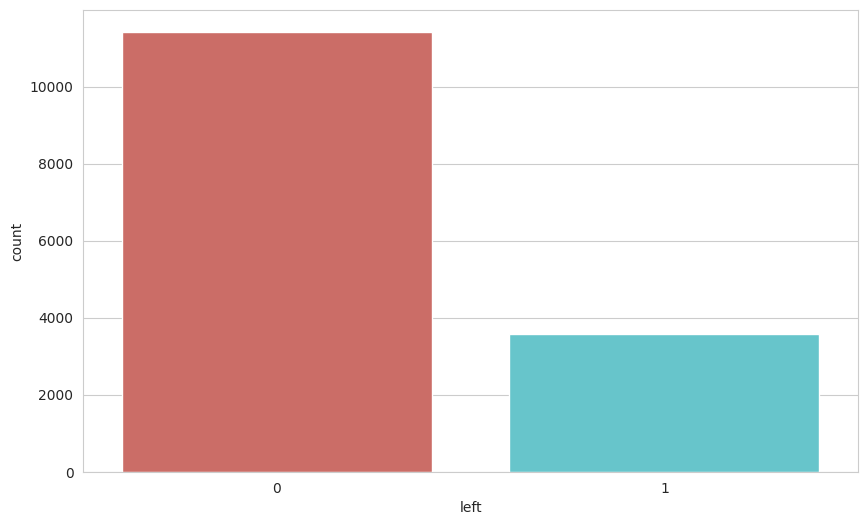

In [5]:
sns.countplot(x='left', hue='left', data=HR_data, palette='hls', legend=False)

In [6]:
HR_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
left_df = pd.DataFrame(HR_data['left'], columns=['left'])
left_df.head()

,left
0,1
1,1
2,1
3,1
4,1


In [8]:
HR_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
left_count = HR_data[HR_data['left'] == 1].groupby('salary').size()
stay_count = HR_data[HR_data['left'] == 0].groupby('salary').size()

In [10]:
departments = HR_data.groupby(HR_data['Department'])
departments.mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [11]:
salaries = ['low','medium','high']
index = range(len(salaries))

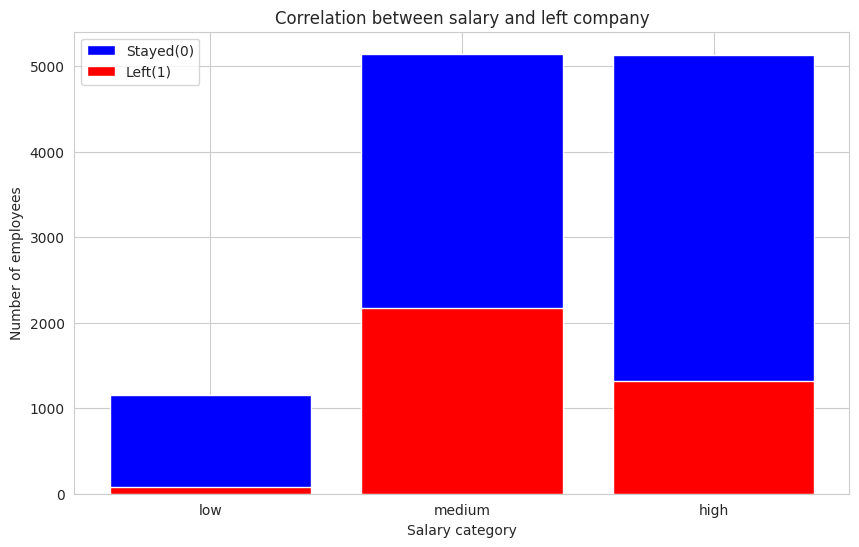

In [12]:
plt.bar(index, stay_count, label='Stayed(0)', color='blue')
plt.bar(index, left_count, label='Left(1)', color='red')

plt.xlabel('Salary category')
plt.ylabel('Number of employees')
plt.title('Correlation between salary and left company')
plt.xticks(index, salaries)
plt.legend()

plt.show()

In [13]:
departments = ['IT','RandD','accounting','hr','management','marketing','product_mng','sales','support','technical']
index = range(len(departments))

In [14]:
left_count = HR_data[HR_data['left'] == 1].groupby('Department').size()
stay_count = HR_data[HR_data['left'] == 0].groupby('Department').size()


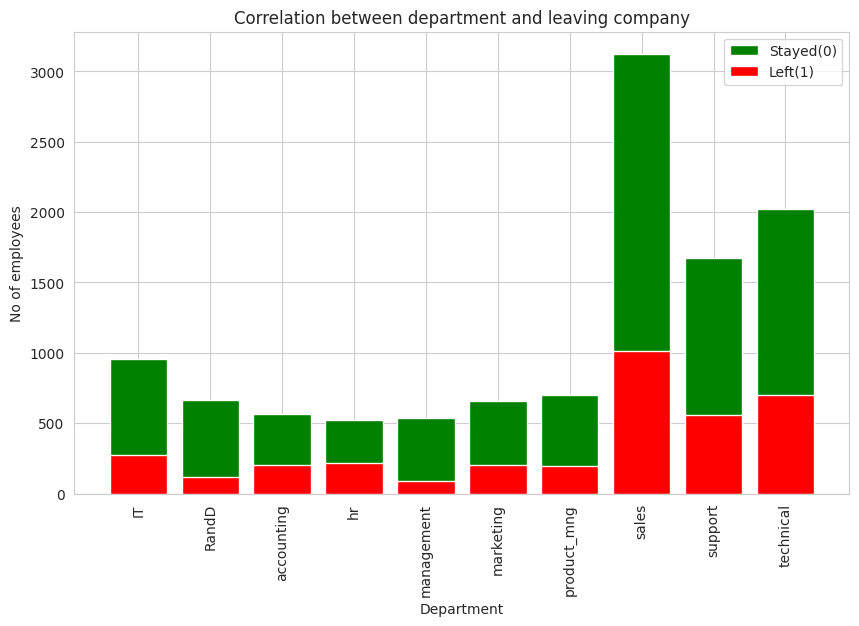

In [15]:
plt.bar(index, stay_count, label='Stayed(0)', color='green')
plt.bar(index, left_count, label='Left(1)', color='red')

plt.xlabel('Department')
plt.ylabel('No of employees')
plt.title('Correlation between department and leaving company')
plt.xticks(index, departments, rotation=90)
plt.legend()
plt.show()

In [16]:
HR_data.drop(['Department','salary'], axis=1, inplace=True)
HR_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [17]:
HR_data_pearson = HR_data.corr(method='pearson')
HR_data_pearson

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [18]:
X_train, X_test, y_train, y_test = train_test_split(HR_data.drop('left', axis=1), HR_data['left'], test_size=0.20)

In [19]:
print(X_train.shape)
print(y_train.shape)

(11999, 7)
(11999,)


In [20]:
X_train[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
5252,0.82,0.60,3,261,2,1,0
8093,0.78,0.77,2,177,4,0,0
1939,0.10,0.79,7,310,4,0,0
7352,0.91,1.00,4,125,4,0,0
427,0.55,0.60,3,180,4,0,0


In [21]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train.values, y_train.values)

LogisticRegression(solver='liblinear')

In [22]:
y_pred = LogReg.predict(X_test.values)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2255
           1       0.53      0.27      0.36       745

    accuracy                           0.76      3000
   macro avg       0.66      0.60      0.61      3000
weighted avg       0.73      0.76      0.73      3000



In [24]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[8517,  656],
       [2129,  697]])

In [25]:
precision_score(y_train, y_train_pred)

np.float64(0.5151515151515151)

In [26]:
HR_data[50:51]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
50,0.13,0.78,6,152,2,0,1,0


In [27]:
test_emp = np.array(['0.15','0.75','5','150','3','0','0']).astype(float).reshape(1,-1)

print(LogReg.predict(test_emp))
print(LogReg.predict_proba(test_emp))

[0]
[[0.512417 0.487583]]
